In [ ]:
import os
import sys; sys.path.insert(0, '..')
import seaborn as sns
import numpy as np
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
from df_utils import df_wrapper, get_timestamp_and_pose
import pandas as pd
import timesync_utils as tutils

In [ ]:
#os.getcwd() + "/data/sensortest/data_martin_sensortest.csv"

csv_f_name = "../../data/train_data/data_martin_1_forsok2.csv"
annot_f_name = "../../data/annotation/martin_train_1_2.txt"


POSE_MAP = {
    "rett": 0,
    "fram": 1,
    "fram-hoyre": 2,
    "hoyre": 3,
    "bak-hoyre": 4,
    "bak": 5,
    "bak-venstre": 6,
    "venstre": 7,
    "fram-venstre": 8
}



In [ ]:
knn_train = df_wrapper(csv_f_name)
knn_train.concat_sensor_data(1)
knn_train.df

Splitting into  1  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  108923


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.0000,0.055852,-0.850004,-0.522613,0.477187,0.166713,0.773870,14.211246,-36.243279,-17.685274,57.598854,3.964652,112.215050,0.502203,-0.243316,-0.416553,-0.717686
1,0.0100,0.053982,-0.847812,-0.524139,0.620501,-0.146498,0.744636,14.211246,-36.243279,-17.685274,57.605247,3.957579,112.217804,0.502149,-0.243379,-0.416570,-0.717692
2,0.0200,0.054749,-0.845914,-0.523289,0.622881,-0.400285,0.575458,14.240719,-35.231506,-18.137564,57.639400,3.918052,112.217224,0.501948,-0.243785,-0.416619,-0.717667
3,0.0300,0.055202,-0.845480,-0.522088,0.695164,-0.518200,0.490021,14.240719,-36.215172,-18.348635,57.646221,3.911144,112.215462,0.501921,-0.243865,-0.416629,-0.717652
4,0.0400,0.057666,-0.846127,-0.522310,0.304298,-0.322965,0.419240,14.181771,-35.315819,-18.348635,57.649235,3.905876,112.214981,0.501900,-0.243914,-0.416625,-0.717653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108918,1094.0200,0.321389,-0.685343,-0.665695,-0.786466,0.065000,-0.194858,23.318640,-26.294188,-23.625341,45.836315,18.429302,107.622223,0.587151,-0.107925,-0.397319,-0.696953
108919,1094.0300,0.318509,-0.683672,-0.666571,-0.485213,0.025407,-0.091789,23.082848,-26.575235,-23.776104,45.831314,18.430136,107.621742,0.587160,-0.107896,-0.397292,-0.696966
108920,1094.0400,0.317634,-0.682444,-0.667056,-0.113226,-0.157815,0.083809,23.171270,-26.828178,-23.414272,45.830009,18.428431,107.621178,0.587161,-0.107902,-0.397276,-0.696973
108921,1094.0500,0.317632,-0.681110,-0.665008,0.118751,-0.064025,-0.025322,23.082848,-27.221643,-23.323814,45.830982,18.428162,107.620506,0.587164,-0.107912,-0.397280,-0.696967


[[0.0, 122.2, 0], [126.72, 244.52, 1], [247.56, 362.92, 2], [368.64, 483.24, 3], [488.72, 602.64, 4], [608.0, 722.0, 5], [726.76, 841.0, 6], [848.56, 964.2, 7], [969.0, 1083.08, 8]]
Length of knn_train.df before drops: 108923
drops: 5215
length of knn_train.df after drops: 103708
103708
103708


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

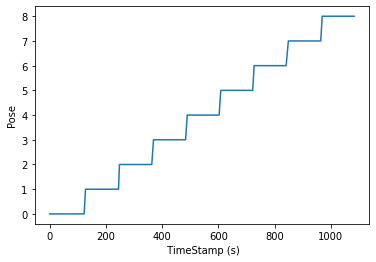

In [ ]:
stamped_poses = get_timestamp_and_pose(annot_f_name, POSE_MAP)
print(stamped_poses)
print("Length of knn_train.df before drops: {}".format(len(knn_train.df.index)))
knn_train.align_poses(stamped_poses)

print(len(knn_train.df.index))
# print(len(df_stamped_poses))
y_train = knn_train.df["Pose"]
# df['Pose'].hist(bins=4)
sns.lineplot(data=knn_train.df, x=" TimeStamp (s)", y='Pose')
#sns.histplot(data=knn_train.df['SensorId'])

<AxesSubplot:xlabel='Pose', ylabel='Count'>

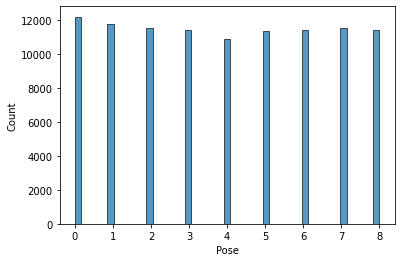

In [ ]:
sns.histplot(data=y_train)

In [ ]:
csv_file = "../../data/test_data/data_martin_test_1.csv"
annot_file = "../../data/annotation/martin_test_1.txt"

knn_test = df_wrapper(csv_file)
knn_test.concat_sensor_data(1)
knn_test.df

Splitting into  1  separate dataframes...
Fixing time offsets
Dropping unused columns...
Min length of sensor data:  9271


,TimeStamp (s),AccX (g),AccY (g),AccZ (g),GyroX (deg/s),GyroY (deg/s),GyroZ (deg/s),MagX (uT),MagY (uT),MagZ (uT),EulerX (deg),EulerY (deg),EulerZ (deg),QuatW,QuatX,QuatY,QuatZ
0,0.00,0.053903,-0.816850,-0.580822,-0.556335,0.194702,-0.458328,14.830194,-35.484447,-18.650160,54.890663,3.451723,150.430130,0.239789,-0.091722,-0.452260,-0.854136
1,0.01,0.054835,-0.812938,-0.580522,-0.396357,0.053162,-0.421629,15.655459,-34.697517,-19.524584,54.886578,3.455478,150.428131,0.239822,-0.091693,-0.452235,-0.854144
2,0.02,0.054938,-0.811583,-0.581577,-0.377939,0.162920,-0.511693,15.979671,-34.781830,-19.223057,54.882706,3.460602,150.426514,0.239857,-0.091653,-0.452214,-0.854149
3,0.03,0.053937,-0.810908,-0.581683,-0.164693,0.127606,-0.495350,14.712300,-35.653080,-20.218092,54.843308,3.439274,150.432983,0.239758,-0.091706,-0.451886,-0.854345
4,0.04,0.053970,-0.809885,-0.581014,-0.108978,-0.126018,-0.665017,14.712300,-35.653080,-20.218092,54.841930,3.443989,150.428116,0.239814,-0.091686,-0.451881,-0.854334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9266,92.66,0.219797,-0.624254,-0.749166,-22.174156,6.663579,25.612938,3.659636,-34.725616,-23.504728,44.695168,10.709045,-107.651093,-0.514891,0.293117,-0.254643,-0.764281
9267,92.67,0.213225,-0.635300,-0.755785,-19.057951,7.889685,23.056574,3.571217,-35.400135,-23.866562,44.545895,10.603254,-107.427711,-0.517090,0.292274,-0.253606,-0.763464
9268,92.68,0.178810,-0.634856,-0.746471,-16.897160,12.539111,20.939047,3.836480,-35.456345,-23.926868,44.409973,10.545042,-107.190742,-0.519194,0.291816,-0.252389,-0.762614
9269,92.69,0.231810,-0.624379,-0.821411,-16.859692,16.613245,17.996923,3.836480,-35.456345,-23.926868,44.286991,10.538007,-106.941689,-0.521186,0.291760,-0.250972,-0.761744


[[0.0, 9.8, 0], [10.88, 19.52, 1], [21.08, 29.68, 2], [31.32, 39.96, 3], [41.0, 49.64, 4], [51.24, 59.52, 5], [60.72, 70.0, 6], [71.4, 79.64, 7], [81.24, 89.64, 8]]
drops: 1410
length of knn_train.df after drops: 7861
7861


<AxesSubplot:xlabel=' TimeStamp (s)', ylabel='Pose'>

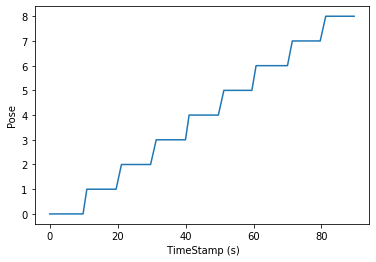

In [ ]:
s_poses = get_timestamp_and_pose(annot_file, POSE_MAP)

print(s_poses)
knn_test.align_poses(s_poses)

y_test = knn_test.df["Pose"]  # df_test["Pose"]

sns.lineplot(data=knn_test.df, x=" TimeStamp (s)", y='Pose')

<AxesSubplot:xlabel='Pose', ylabel='Count'>

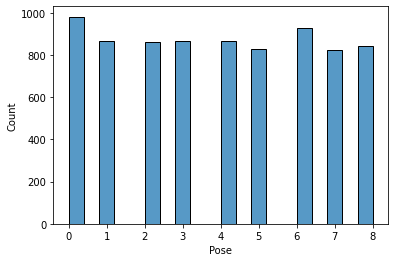

In [ ]:
sns.histplot(data=y_test)

In [ ]:
x_train = knn_train.df.drop([' TimeStamp (s)'],axis=1)
x_test = knn_test.df.drop([' TimeStamp (s)'], axis=1) 

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(103708, 17)
(103708,)
(7861, 17)


In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#pipe = make_pipeline(KNeighborsClassifier(n_neighbors=30))
#pipe.fit(x_train, y_train)
#predictions = pipe.predict(x_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

rfc = RandomForestClassifier(n_estimators=130, random_state=69)
rfc.fit(x_train,y_train)
predictions = rfc.predict(x_test)

In [ ]:
"""k = 1
accuracy_array = []
k_array = []

for num in range(20):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0
    for num in range(len(predictions)):
        if predictions[num] == y_test.iloc[num]:
            number_of_corrects += 1
    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)
"""

'k = 1\naccuracy_array = []\nk_array = []\n\nfor num in range(20):\n    neigh = KNeighborsClassifier(n_neighbors=k)\n    neigh.fit(x_train,y_train)\n    predictions = neigh.predict(x_test)\n    number_of_corrects = 0\n    for num in range(len(predictions)):\n        if predictions[num] == y_test.iloc[num]:\n            number_of_corrects += 1\n    print("number of correct: {}".format(number_of_corrects))\n    print("number of guesses: {}".format(len(predictions)))\n    print("% correct: {}".format(number_of_corrects/len(predictions)*100))\n    accuracy_array.append(number_of_corrects/len(predictions)*100)\n    k_array.append(k)\n    print("K: {}".format(k))\n    k += 1\n    print(accuracy_array)\n    print(k_array)\n'

<AxesSubplot:xlabel='x', ylabel='y'>

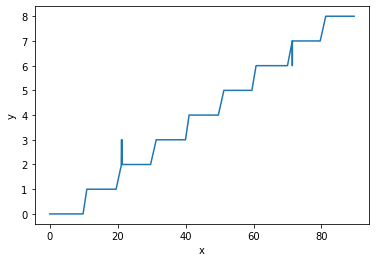

In [ ]:
df_predict = pd.DataFrame({'x': knn_test.df[' TimeStamp (s)'], 'y': predictions})
sns.lineplot(data=df_predict, x='x', y='y')

[[981   0   0   0   0   0   0   0   0]
 [  0 865   0   0   0   0   0   0   0]
 [  0   0 855   6   0   0   0   0   0]
 [  0   0   0 865   0   0   0   0   0]
 [  0   0   0   0 865   0   0   0   0]
 [  0   0   0   0   0 829   0   0   0]
 [  0   0   0   0   0   0 929   0   0]
 [  0   0   0   0   0   0   1 824   0]
 [  0   0   0   0   0   0   0   0 841]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      1.00      1.00       865
           2       1.00      0.99      1.00       861
           3       0.99      1.00      1.00       865
           4       1.00      1.00      1.00       865
           5       1.00      1.00      1.00       829
           6       1.00      1.00      1.00       929
           7       1.00      1.00      1.00       825
           8       1.00      1.00      1.00       841

    accuracy                           1.00      7861
   macro avg       1.00      1.00      1.00      786

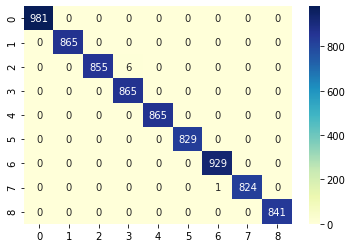

In [ ]:

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions, zero_division=True))

sns.heatmap(confusion_matrix(y_test, predictions),
            cmap="YlGnBu", annot=True, fmt="d")

number_of_corrects = 0
for num in range(len(predictions)):
    if(predictions[num] == y_test.iloc[num]):
        number_of_corrects += 1

print("number of correct: {}".format(number_of_corrects))
print("number of guesses: {}".format(len(predictions)))
print("% correct: {}".format(number_of_corrects / len(predictions) * 100))

In [ ]:
"""
for num in range(len(predictions)):
    print(predictions[num])
"""

"""
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
k = 1
accuracy_array = []
k_array = []
for num in range(20):
    
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x_train,y_train)
    predictions = neigh.predict(x_test)
    number_of_corrects = 0
    print(y_test[1200:1230])
   
    for n in range(len(predictions)):
        if(predictions[n] == y_test[n]):
            number_of_corrects += 1
    print("number of correct: {}".format(number_of_corrects))
    print("number of guesses: {}".format(len(predictions)))
    print("% correct: {}".format(number_of_corrects/len(predictions)*100))
    accuracy_array.append(number_of_corrects/len(predictions)*100)
    k_array.append(k)
    print("K: {}".format(k))
    k += 1
    print(accuracy_array)
    print(k_array)
resframe = pd.DataFrame({'k':k_array, '%':accuracy_array})
resframe
    
sns.lineplot(data=resframe,x="k",y="%")
"""

'\nfrom sklearn import svm\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.neighbors import NeighborhoodComponentsAnalysis,KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.neighbors import KNeighborsClassifier\nk = 1\naccuracy_array = []\nk_array = []\nfor num in range(20):\n    \n    neigh = KNeighborsClassifier(n_neighbors=k)\n    neigh.fit(x_train,y_train)\n    predictions = neigh.predict(x_test)\n    number_of_corrects = 0\n    print(y_test[1200:1230])\n   \n    for n in range(len(predictions)):\n        if(predictions[n] == y_test[n]):\n            number_of_corrects += 1\n    print("number of correct: {}".format(number_of_corrects))\n    print("number of guesses: {}".format(len(predictions)))\n    print("% correct: {}".format(number_of_corrects/len(predictions)*100))\n    accuracy_array.append(number_of_corrects/len(predictions)*100)\n    k_ar

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=59d486bc-e14d-4632-9064-12272fc72d11' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>